# DAPGEO-02 Well Logs 
## Phase 2: 40 - 230 m

### Curve abbreviations

- GR: Total gamma ray (API)
- K: Potassium content (%)
- TH: Thorium content (ppm)
- U: Uranium content (ppm)
- N8: 8” normal resistivity (Ωm)
- N16: 16’’ normal resistivity (Ωm)
- N32: 32’’ normal resistivity (Ωm)
- N64: 64’’ normal resistivity (Ωm)
- SP: Spontaneous Potential (mV)
- SPR: Single Point Resistance (Ω)
- MA16: 16” chargeability (ms)
- MA64: 64’’ chargeability (ms)

In [16]:
from sys import stdout
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline   

In [17]:
# This function converts null values to NaN
# E.g. null = -9999.25 > Type <print(lasfile.well)> to find out this value
def valtonan(inp, val=-99999.000000):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))

#This function smoothes the curves for better visualization
def smooth(data, window_len=10):
    """Smooth the data using a window with requested size."""
    s_p = np.r_[2*data[0]-data[window_len:1:-1],
                data, 2*data[-1]-data[-1:-window_len:-1]]
    w_p = np.ones(window_len, 'd')
    y_p = np.convolve(w_p/w_p.sum(), s_p, mode='same')
    return y_p[window_len-1:-window_len+1]


In [18]:
# Loading data

# Gamma Ray and Radioactive Elements
p2_kut = pd.read_csv('../data/interim/phase2_GR_K_U_T.csv')

# VSP
p2_vsp = pd.read_csv('../data/interim/phase2_VSP.csv')

# SPR
p2_spr = pd.read_csv('../data/interim/phase2_SPR.csv')

# Electrical Resistivity N8, N16, N32, N64
p2_n8 = pd.read_csv('../data/interim/phase2_N8.csv')
p2_n16 = pd.read_csv('../data/interim/phase2_N16.csv')
p2_n32 = pd.read_csv('../data/interim/phase2_N32.csv')
p2_n64 = pd.read_csv('../data/interim/phase2_N64.csv')

# Polarization Logs MA16, MA64
p2_ma16 = pd.read_csv('../data/interim/phase2_MA16.csv')
p2_ma64 = pd.read_csv('../data/interim/phase2_MA64.csv')

In [19]:
# Converting invalid values (-99999.000000) to Nan

p2_kut=valtonan(p2_kut)

p2_vsp=valtonan(p2_vsp)
p2_spr=valtonan(p2_spr)

p2_n8=valtonan(p2_n8)
p2_n16=valtonan(p2_n16)
p2_n32=valtonan(p2_n32)
p2_n64=valtonan(p2_n64)

p2_ma16=valtonan(p2_ma16)
p2_ma64=valtonan(p2_ma64)

In [20]:
# Reading the .csv file containing core depths  
cores = pd.read_csv('../data/raw/dapgeo-02_cores.csv')
cores.head()

,Core Name,Top Depth,Bottom Depth,CT scan
0,DAPGEO-02-C1,115.20,115.98,yes
1,DAPGEO-02-C2,115.98,116.82,yes
2,DAPGEO-02-C3,122.00,122.70,yes
3,DAPGEO-02-C4,122.70,123.41,yes
4,DAPGEO-02-C5,124.00,124.72,yes


In [29]:
# (x1, x2), (bottom, top), 'color'
for ii in range(len(cores)):
        c = [(0, 0), (cores['Bottom Depth'][ii], cores['Top Depth'][ii]), 'g']

/tmp/ipykernel_863/1842069214.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)


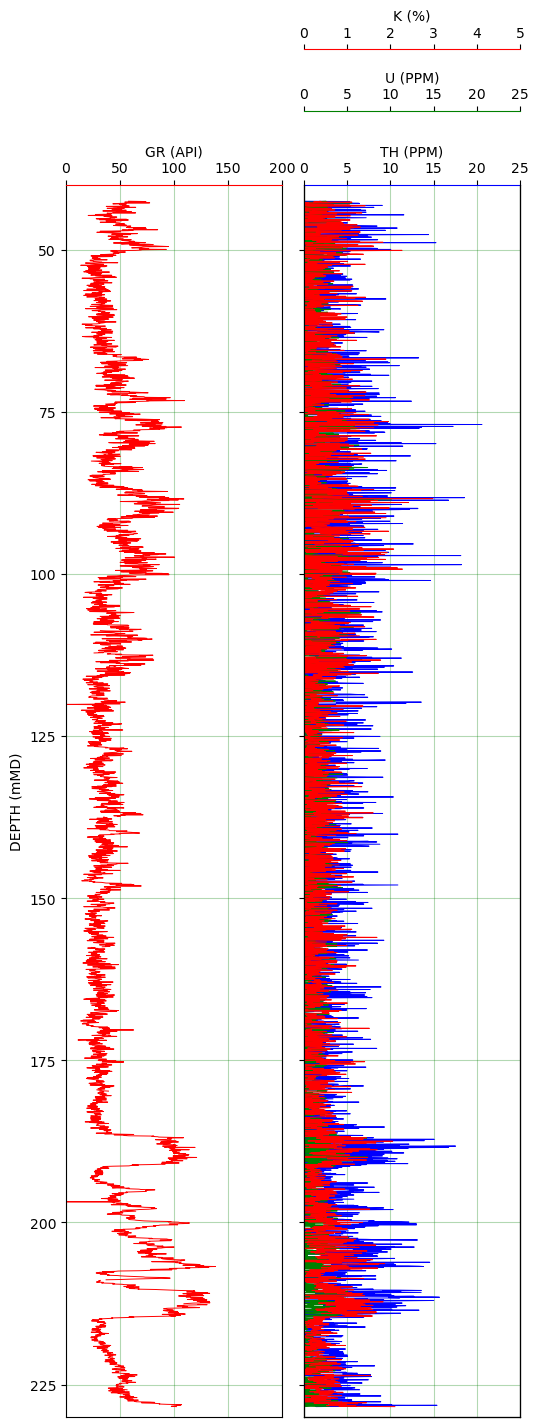

In [30]:
f1, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f1.subplots_adjust(wspace = 0.1)

curve_names = ['GR (API)', 'TH (PPM)','U (PPM)','K (%)']

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

#Set up the individual log tracks
ax1.plot(p2_kut['GR.API'], p2_kut['DEPTH.M'], color = "red", lw = 0.7)
ax1.plot(*c, linewidth=5,alpha=0.7)
ax1.set_xlim(0, 200)
ax1.set_ylim(40,230)
ax1.spines['top'].set_edgecolor('red')
ax1.set_ylabel('DEPTH (mMD)')
ax1.invert_yaxis()

ax2.plot(p2_kut['TH.PPM'], p2_kut['DEPTH.M'], color = "blue", lw = 0.7)
ax2.set_xlim(0, 25)
ax2.set_ylim(40,230)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(p2_kut['U.PPM'], p2_kut['DEPTH.M'], color = "green", lw = 0.7)
ax3.set_xlim(0, 25)
ax3.set_ylim(40,230)
ax3.spines['top'].set_edgecolor('green')

ax4.plot(p2_kut['K.%'], p2_kut['DEPTH.M'], color = "red", lw = 0.7)
ax4.set_xlim(0, 5)
ax4.set_ylim(40,230)
ax4.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots

for i, ax in enumerate(f1.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 2:
        ax.spines["top"].set_position(("axes", 0.96+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 

for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P2_GR_KUTH.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_863/2256988812.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


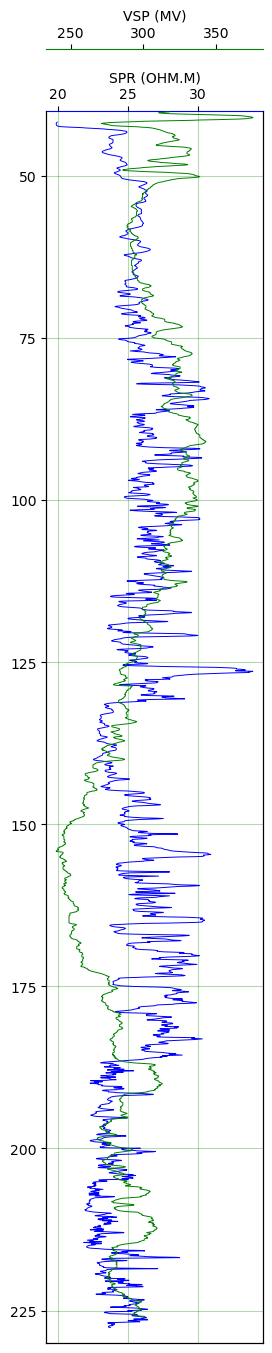

In [23]:
f2, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f2.subplots_adjust(wspace = 0.1)

curve_names = ['SPR (OHM.M)','VSP (MV)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

ax2.plot(p2_spr['SPR.OHM'], p2_spr['DEPTH.M'], color = "blue", lw = 0.7)
#ax2.set_xlim(0, 25)
ax2.set_ylim(40,230)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(p2_vsp['VSP.MV'], p2_vsp['DEPTH.M'], color = "green", lw = 0.7)
#ax3.set_xlim(0, 25)
ax3.set_ylim(40,230)
ax3.spines['top'].set_edgecolor('green')


#Set up the common elements between the subplots
for i, ax in enumerate(f2.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P2_VSP_SPR.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_863/3270662496.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


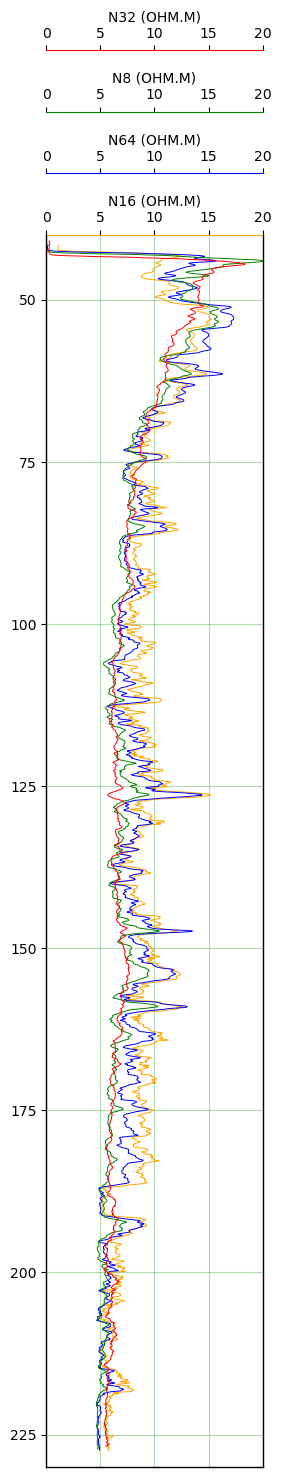

In [24]:
f3, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f3.subplots_adjust(wspace = 0.1)

curve_names = ['N16 (OHM.M)', 'N64 (OHM.M)','N8 (OHM.M)', 'N32 (OHM.M)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()
ax5 = ax2.twiny()

#N8
ax2.plot(p2_n8['N8.OHM.M'], p2_n8['DEPTH.M'], color = "orange", lw = 0.7)
ax2.set_xlim(0, 20)
ax2.set_ylim(40,230)
ax2.spines['top'].set_edgecolor('orange')

#N16
ax3.plot(p2_n16['N16.OHM.M'], p2_n16['DEPTH.M'], color = "blue", lw = 0.7)
ax3.set_xlim(0, 20)
ax3.set_ylim(40,230)
ax3.spines['top'].set_edgecolor('blue')

#N32
ax4.plot(p2_n32['N32.OHM.M'], p2_n32['DEPTH.M'], color = "green", lw = 0.7)
ax4.set_xlim(0, 20)
ax4.set_ylim(40,230)
ax4.spines['top'].set_edgecolor('green')

#N64
ax5.plot(p2_n64['N64.OHM.M'], p2_n64['DEPTH.M'], color = "red", lw = 0.7)
ax5.set_xlim(0, 20)
ax5.set_ylim(40,230)
ax5.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots
for i, ax in enumerate(f3.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P2_RES.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_863/740734462.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


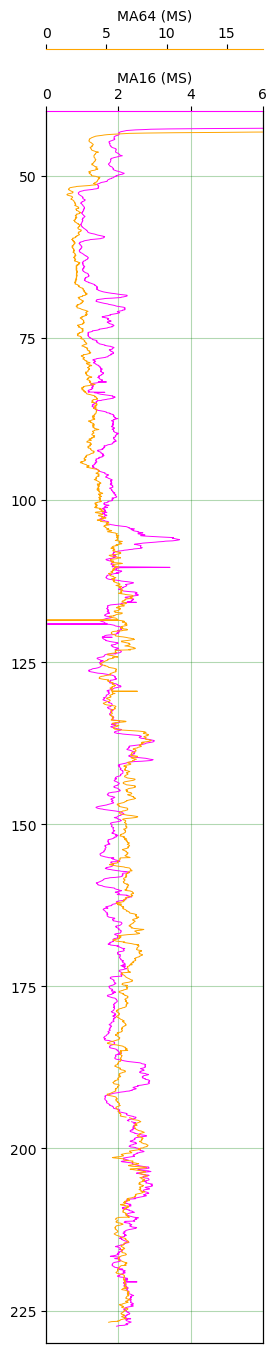

In [25]:
f4, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f4.subplots_adjust(wspace = 0.1)

curve_names = ['MA16 (MS)','MA64 (MS)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

ax2.plot(p2_ma16['MA16.MS'], p2_ma16['DEPTH.M'], color = "magenta", lw = 0.7)
ax2.set_xlim(0, 6)
ax2.set_ylim(40,230)
ax2.spines['top'].set_edgecolor('magenta')

ax3.plot(p2_ma64['MA64.MS'], p2_ma64['DEPTH.M'], color = "orange", lw = 0.7)
ax3.set_xlim(0, 18)
ax3.set_ylim(40,230)
ax3.spines['top'].set_edgecolor('orange')

#Set up the common elements between the subplots
for i, ax in enumerate(f4.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P2_IP.png', bbox_inches='tight', dpi=300)